# HW1 - Classification models in sklearn - PDalvi

After successfully creating the folder structure using the cookiecutter-datascience-simple template and applygin version control on the files, we start by importing all the required libraries for our analysis. We start EDA using the original data file, followed by model building using the classification version of the file, as it already had the price_gt_1M variable required for analysis.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
from pandas_profiling import ProfileReport

import sys

import datetime as DT


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split


from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [116]:
%matplotlib inline

## EDA

In [117]:
#importing the original data
housing_df = pd.read_csv("./data/kc_house_data_original.csv")

In [118]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

info method prints the information or summary of the dataframe. It prints the various information of the Dataframe such as index type, dtype, columns, non-values, and memory usage. It gives a quick overview of the dataset. As per the results, except date all other variables are either int or float type.

In [119]:
housing_df.shape

(21613, 21)

shape method give an overview of the number of rows and column in our dataframe. Our housing_df dataframe has 21613 rows and 21 variables/columns. Next, we check if there are any null or missing values in our dataframe.

In [120]:
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [121]:
housing_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

describe() function computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. This function excludes the character columns and gives summary about numeric columns.

In [122]:
housing_df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

The nunique function helps to understand the number of unique values in the dataframe. The head and tail function will help us to view the first and last 5 records respectively.

In [123]:
housing_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [124]:
housing_df.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

pandas_profiling's ProfileReport() will generate a basic report with an extended analysis of a DataFrame while alllowing the data analysis to be exported in different formats such as html and json. The code is commented as it generates and overwrites the existing report everytime and the execution take few minutes to run. The output report is stored in output folder with the file name pandas_Profilinf_report.html.

In [125]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(housing_df, title="Pandas Profiling Report")
#profile.to_file("output/pandas_Profilinf_report.html")

Below code will embed the output of html report file to the jupter notebook. However the output was big, so I commented it and kept the code for reference and for future direct access to the output file.

In [126]:
#from IPython.display import display, HTML
#HTML(filename="output/pandas_Profilinf_report.html")

Similar to pandas_profiling's ProfileReport() we have sweetviz which gives us an automated analyzed EDA report, output of which is stored in output folder with file name output/Sweetviz_report.html.

In [127]:
#import sweetviz

#report = sweetviz.analyze(housing_df)
#report.show_html("output/Sweetviz_report.html")

Even though we have our detailed automated reports from andas_profiling's ProfileReport() and sweetviz, we will do some EDA to anaylze data. Below we are checking for the correlation between the variables to check for any high correlation (positive or negative) between the data. Also we will check for the 10 variables with the highest correlation with 'price' as price is our target variable.

In [128]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = housing_df.corr()
corr.style.background_gradient().set_precision(2)

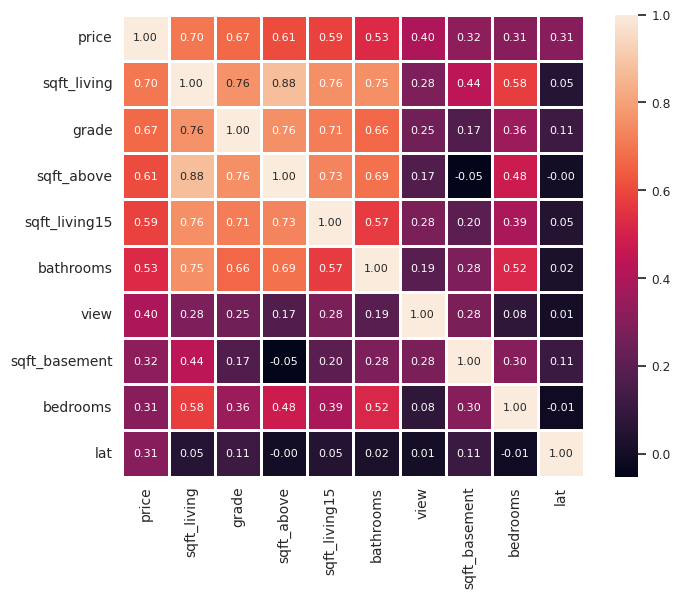

In [129]:
# price correlation matrix
#Let's visualize only the 10 variables with the highest correlation with 'price'.

corr = housing_df.corr()
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(housing_df[cols].values.T)


with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=0.8)
    ax = sns.heatmap(cm,cbar=True, square=True, annot=True,fmt='0.2f',linewidths=.8, annot_kws={'size': 8}, yticklabels=cols.values,
                     xticklabels=cols.values)
    

The highest correlation is .88 between sqft_above and sqft_living which is not too high too to exclude any one of them from the calculation.

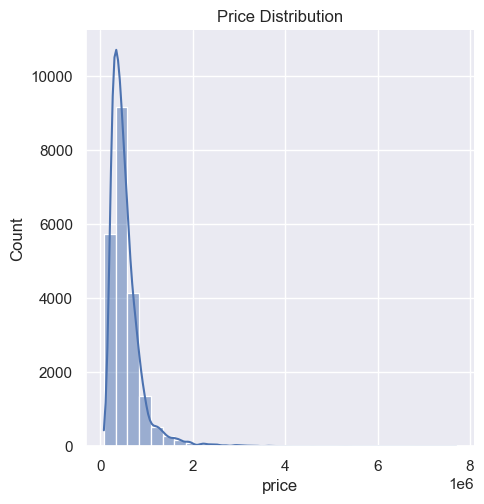

In [130]:
sns.set_theme()
sns.displot(housing_df['price'] , bins=30 , kde=True ).set(title='Price Distribution')
plt.show()

The below price by waterfront boxplot shows that the price of the house near waterfront is higher than the ones not near the waterfront. Also the IQR range of the houses near the waterfront is larger than the ones not near the waterfront. However, there are lots of outliers (usually 3 times of standard deviation) in the category of houses not near the waterfront.

(100000.0, 10000000.0)

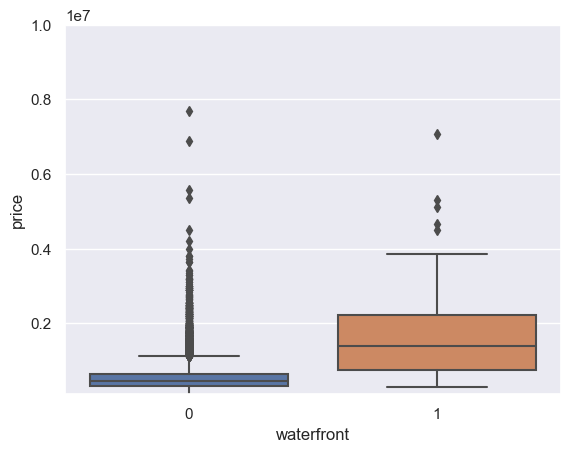

In [131]:
ax = sns.boxplot(x = "waterfront", y = "price", data = housing_df)
ax.set_ylim(100000,10000000)

Based on the count of houses by number of bedrooms plot we see that the count of houses with 3 bedrooms is highest followed by 4 bedrooms, there are also few outliers like the 11 and 33 bedrooms category which is a bid odd in a normal house categories.

[Text(0.5, 1.0, 'House count by # of bedrooms')]

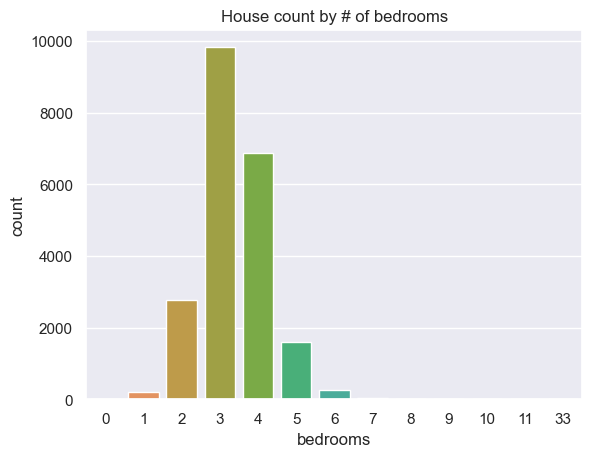

In [132]:
sns.countplot(x=housing_df['bedrooms']).set(title='House count by # of bedrooms')

## Categorizing feature types.

To categorize the variables by their feature types we reload the data from the classification version as it already has the price_gt_1M binary variable for price with 1 as the price of the house higher than 1 million, and based on the explanation of the variable and general understanding divide the varaibles in categorical or numerical variables.


In [133]:
housing_class_df = pd.read_csv("./data/kc_house_data_classification.csv")

In [134]:
housing_class_df.info()

housing_class_df["price_gt_1M"] = housing_class_df["price_gt_1M"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

After loading the data, we convert the price_gt_1M variable to category type as its a binary variable for our price variable and it is our target variable for regression. We are dividing our variable in the feature set and target set.

In [135]:
X = housing_class_df.iloc[:, 0:18]
y = housing_class_df.iloc[:, 18]

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [137]:
y.nunique()

2

Based on the variables description we check for the count in each group in the waterfront, view, condition,  grade and yr_renovated variable. We also try to check other variables like bedroom, bathrooms and floor.

In [138]:
X.groupby(['waterfront']).size()

waterfront
0    21450
1      163
dtype: int64

In [139]:
X.groupby(['view']).size()

view
0    19489
1      332
2      963
3      510
4      319
dtype: int64

In [140]:
X.groupby(['condition']).size()

condition
1       30
2      172
3    14031
4     5679
5     1701
dtype: int64

In [141]:
X.groupby(['grade']).size()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
dtype: int64

In [142]:
X.groupby(['yr_renovated']).size()

yr_renovated
0       20699
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Length: 70, dtype: int64

For the yr_built variable we first change the variable type to datetime and use it to calculate the age of the house.

In [143]:
X['yr_built'] = X['yr_built'].map(lambda x: pd.to_datetime(f'{x}-01-01'))
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement   yr_built  yr_renovated  \
0          3      7        1180              0 1955-01-01             0   
1          3      7        2170            400 1951-01-01          1991   
2          3      6         770              0 1933-01-01             0   
3          5      7        1050            910 1965-01-01             0   
4          3      8        1680              0 1987-01-01             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [144]:
X['age'] = (pd.to_datetime('now') - X['yr_built']).astype('<m8[Y]')
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement   yr_built  yr_renovated  \
0          3      7        1180              0 1955-01-01             0   
1          3      7        2170            400 1951-01-01          1991   
2          3      6         770              0 1933-01-01             0   
3          5      7        1050            910 1965-01-01             0   
4          3      8        1680              0 1987-01-01             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   age  
0    98178  47.5112 -122.257           1340        5650  68.0  
1    98125  47.7210 -122.319           1690        7639  72.0  
2    98028  47.7379 -122.233           2720        8062  90.0  
3    98136  47.5208 -122.393           1360        5000  58.0  
4    98074  47.6168 -122.045           1800        7503  36.0

Just for the simplicity of the model, we will only consider waterfront, view, condition and grade as categorical variables and rest as integer/float.

In [145]:
X["waterfront"] = X["waterfront"].astype("category")
X["view"] = X["view"].astype("category")
X["condition"] = X["condition"].astype("category")
X["grade"] = X["grade"].astype("category")
#housing_df["is_renovated"] = housing_df["is_renovated"].astype("category")


#X["bedrooms"] = X["bedrooms"].astype("category")
#X["bathrooms"] = X["bathrooms"].astype("category")
#X["floors"] = X["floors"].astype("category")

In [146]:
#X.groupby(['bedrooms']).size()

In [147]:
#X.groupby(['bathrooms']).size()

In [148]:
#X.groupby(['floors']).size()

In [149]:
#from siuba.dply.forcats import fct_lump

In [150]:
#fct_lump(X['floors'], n=3).value_counts()

In [151]:
#X['floors'] = fct_lump(X['floors'], n=3).value_counts()
#X['bathrooms'] = fct_lump(X['bathrooms'], n=10).value_counts()
#X['bedrooms'] = fct_lump(X['floors'], n=4).value_counts()

In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bedrooms       21613 non-null  int64         
 1   bathrooms      21613 non-null  float64       
 2   sqft_living    21613 non-null  int64         
 3   sqft_lot       21613 non-null  int64         
 4   floors         21613 non-null  float64       
 5   waterfront     21613 non-null  category      
 6   view           21613 non-null  category      
 7   condition      21613 non-null  category      
 8   grade          21613 non-null  category      
 9   sqft_above     21613 non-null  int64         
 10  sqft_basement  21613 non-null  int64         
 11  yr_built       21613 non-null  datetime64[ns]
 12  yr_renovated   21613 non-null  int64         
 13  zipcode        21613 non-null  int64         
 14  lat            21613 non-null  float64       
 15  long           2161

We will drop the yr_built and yr_renovated column

In [153]:
cols_to_keep = X.columns.tolist()
cols_to_keep
aggs_to_drop = ['yr_built', 'yr_renovated']

cols_to_keep = [c for c in cols_to_keep if c not in aggs_to_drop]
cols_to_keep

X = X.loc[:, cols_to_keep]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  category
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  zipcode        21613 non-null  int64   
 12  lat            21613 non-null  float64 
 13  long           21613 non-null  float64 
 14  sqft_living15  21613 non-null  int64   
 15  sqft_lot15     21613 non-null  int64   
 16  age            21613 non-null  float64 
dtypes: category(4), float64(5), int

In [154]:
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
categorical_cols
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
numeric_cols
all_cols = X.columns.tolist()
all_cols


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age']

In [155]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'each col should either be in categorical or numeric lists'

StandardScaler() will standardize features by removing the mean and scaling to unit variance of the numerical variables, OneHotEncoder() will encode categorical features as a one-hot numeric array for categorical variables.

In [156]:
numeric_transformer = StandardScaler()

In [157]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [158]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

#preprocessor

We are dividing our data into 80:20 ratio for train and test/validation.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

## Regression Model

### Creating coef_plot function

In [194]:
def coef_plot(model, title=None):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.plot(model.steps[1][1].coef_[0])
    

### Creating Pipeline

In [195]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])


### Dummy Model - Model-0

Training score: 0.933
Test score: 0.924


Text(0.5, 1.0, 'Dummy Classifier Confusion Matrix - Test Data')

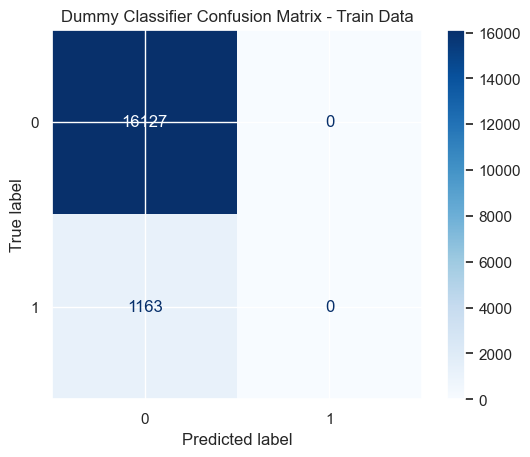

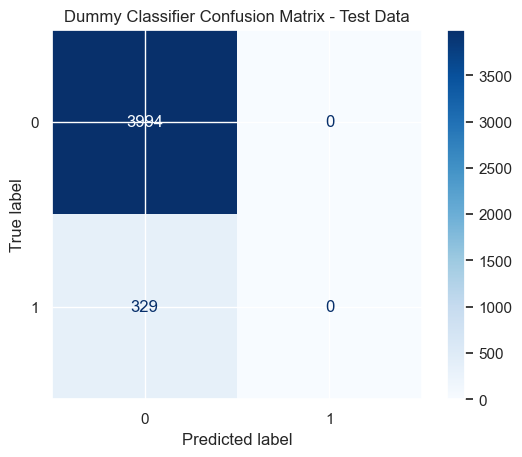

In [196]:

# Classifier model
clf_model_dummy = DummyClassifier(random_state=42) 

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_dummy = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_dummy)])

# Fit model on training data
clf_dummy.fit(X_train, y_train)


print(f"Training score: {clf_dummy.score(X_train, y_train):.3f}")
print(f"Test score: {clf_dummy.score(X_test, y_test):.3f}")


#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(clf_dummy, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Dummy Classifier Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(clf_dummy, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Dummy Classifier Confusion Matrix - Test Data')


Our DummyClassifier model is doing a good job if we consider only the error metrics, which is 93%  for training set and 92% for test set. However, in both the sets (training and testing), the model is not predicting any true positive values, which is not a good sign.

### Model 1: Ridge regression with C=1.0


Training score: 0.961
Test score: 0.961


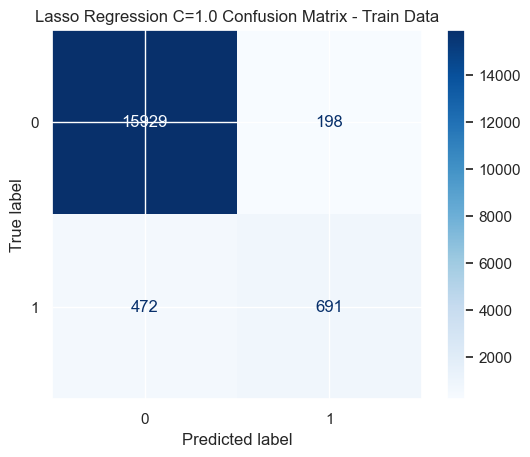

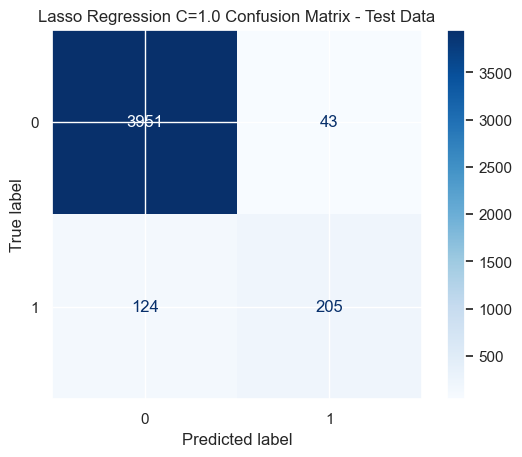

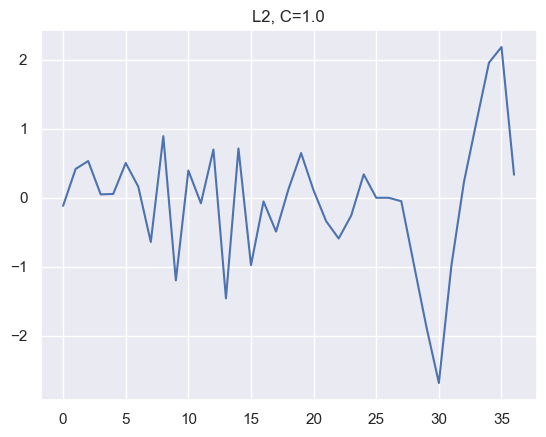

In [197]:
# Model 1 - Ridge Regression C=1.0 Classifier model
clf_model_L2_C1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
clf_L2_C1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_L2_C1)])

# Fit model on training data 
clf_L2_C1.fit(X_train, y_train)

print(f"Training score: {clf_L2_C1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_L2_C1.score(X_test, y_test):.3f}")


#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(clf_L2_C1, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Lasso Regression C=1.0 Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(clf_L2_C1, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Lasso Regression C=1.0 Confusion Matrix - Test Data')

coef_plot(clf_L2_C1, 'L2, C=1.0')

Our accuracy scores have increased from 93 to 96 for training and 92 to 96 for testing dataframe using Ridge regression, compared to DummyClassifier. And the Ridge regression is also predicting the true positive values. However, out goal, is to find a model with good accuracy as well as with better prediction numbers. We will continue our analysis with other models.


### Model 2: Lasso regression with C=1.0


Training score: 0.961
Test score: 0.961


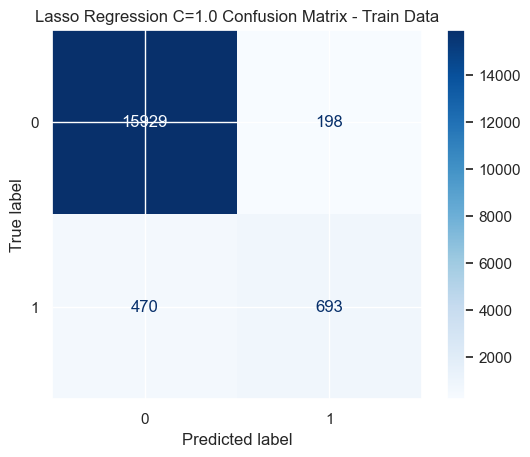

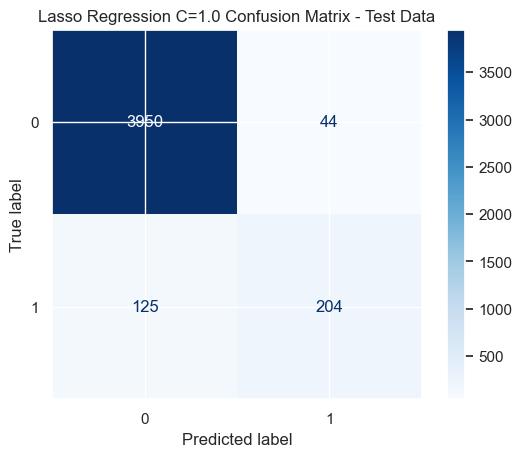

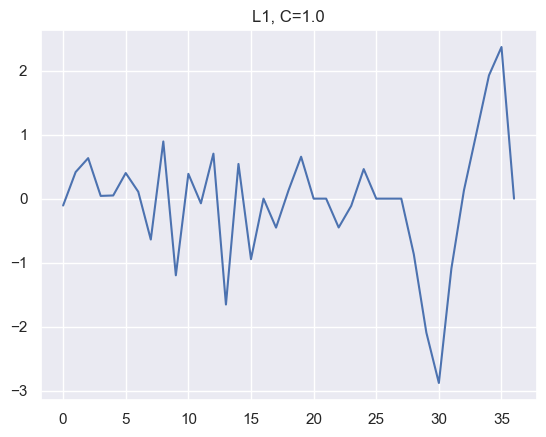

In [198]:
# Model 2 - Lasso Regression C=1.0 Classifier model
clf_model_L1_C1 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
clf_L1_C1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_L1_C1)])

# Fit model on training data 
clf_L1_C1.fit(X_train, y_train)

print(f"Training score: {clf_L1_C1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_L1_C1.score(X_test, y_test):.3f}")



#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(clf_L1_C1, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Lasso Regression C=1.0 Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(clf_L1_C1, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Lasso Regression C=1.0 Confusion Matrix - Test Data')

coef_plot(clf_L1_C1, 'L1, C=1.0')


There is not much difference in the accuracy scores as well as the TP and TN value prediction from the Lasso and Ridge regression with C=1 

### Model 3: Lasso regression with C=0.01

Training score: 0.954
Test score: 0.950


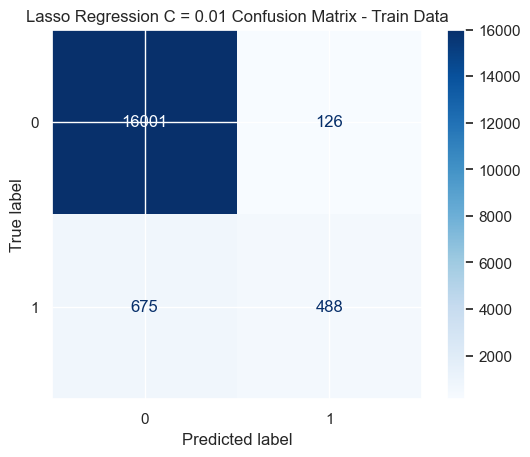

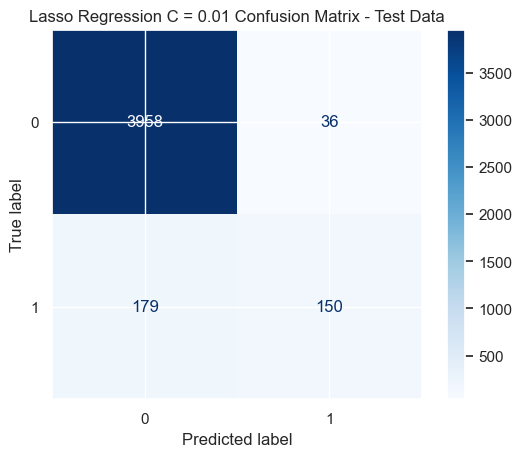

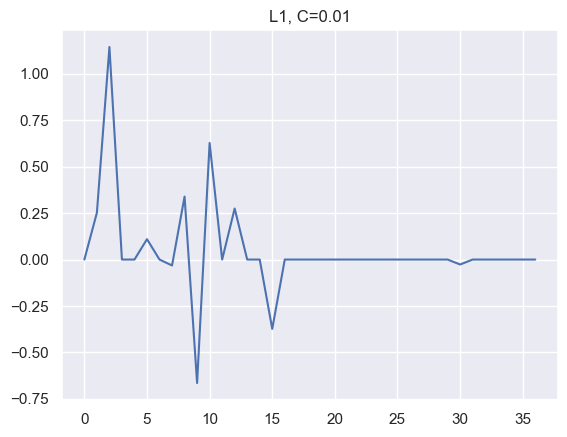

In [199]:
# Model 3 - Lasso Regression C = 0.01 Classifier model
clf_model_L1_C01 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
clf_L1_C01 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_L1_C01)])

# Fit model on training data 
clf_L1_C01.fit(X_train, y_train)

print(f"Training score: {clf_L1_C01.score(X_train, y_train):.3f}")
print(f"Test score: {clf_L1_C01.score(X_test, y_test):.3f}")



#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(clf_L1_C01, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Lasso Regression C = 0.01 Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(clf_L1_C01, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Lasso Regression C = 0.01 Confusion Matrix - Test Data')

coef_plot(clf_L1_C01, 'L1, C=0.01')


With Lasso Regression and C=0.01, our accuracy scores as well the predictions of TN and TP have gone down slightly compared to both Ridge and Lasso Regression with C=0.01.

### Model 4: Lasso regression with optimal C value


Optimal value of C is: [10.]
Training score: 0.962
Test score: 0.960


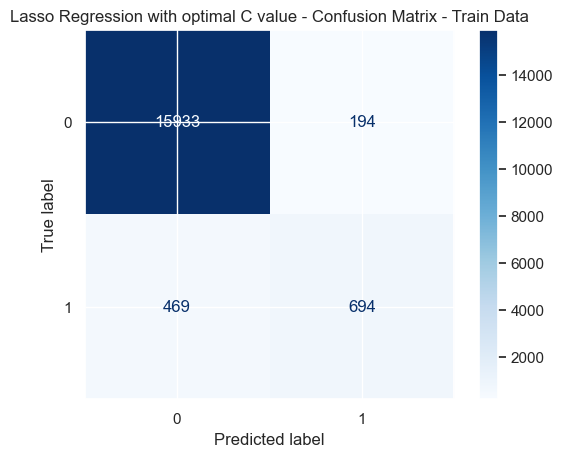

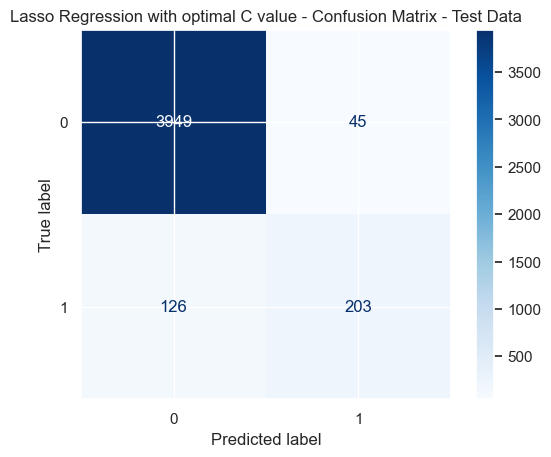

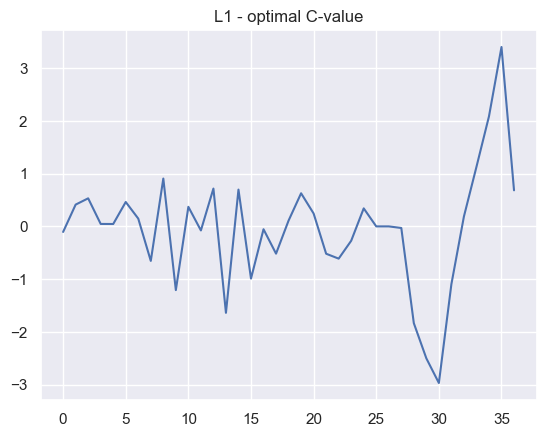

In [200]:
#Lasso RegressionCV to find optimal value of C
clf_model_L1_optC = LogisticRegressionCV(penalty='l1', solver='saga', Cs=[10, 1.0, 0.01, 0.001], max_iter=500, refit=True)

# Append classifier to preprocessing pipeline.
clf_L1_optC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_L1_optC)])

clf_L1_optC.fit(X_train, y_train)

#print(f"Optimal value of C: {clf_L1_optC.C_}") 
#Pulling hyperparameter from pipeline
print(f"Optimal value of C is: {clf_L1_optC.named_steps['classifier'].C_}" )

print(f"Training score: {clf_L1_optC.score(X_train, y_train):.3f}")
print(f"Test score: {clf_L1_optC.score(X_test, y_test):.3f}")

#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(clf_L1_optC, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Lasso Regression with optimal C value - Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(clf_L1_optC, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Lasso Regression with optimal C value - Confusion Matrix - Test Data')

coef_plot(clf_L1_optC, 'L1 - optimal C-value')

The optimal C-value is 10, with accuracy score of 96% on training and test dataset (similar to that of Ridge or Lasso regression with C=1.0). As C-value is high it means more weight is given on minimizing residuals and thus, less regularization is applied.


## Simple decision tree

Training score: 0.984
Test score: 0.981


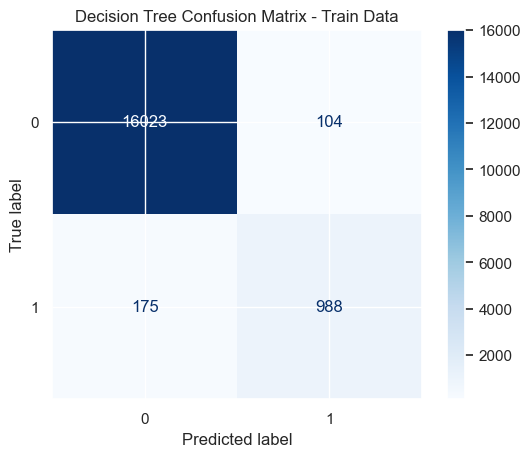

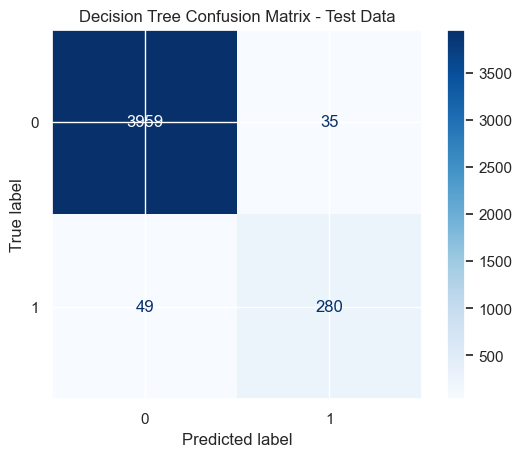

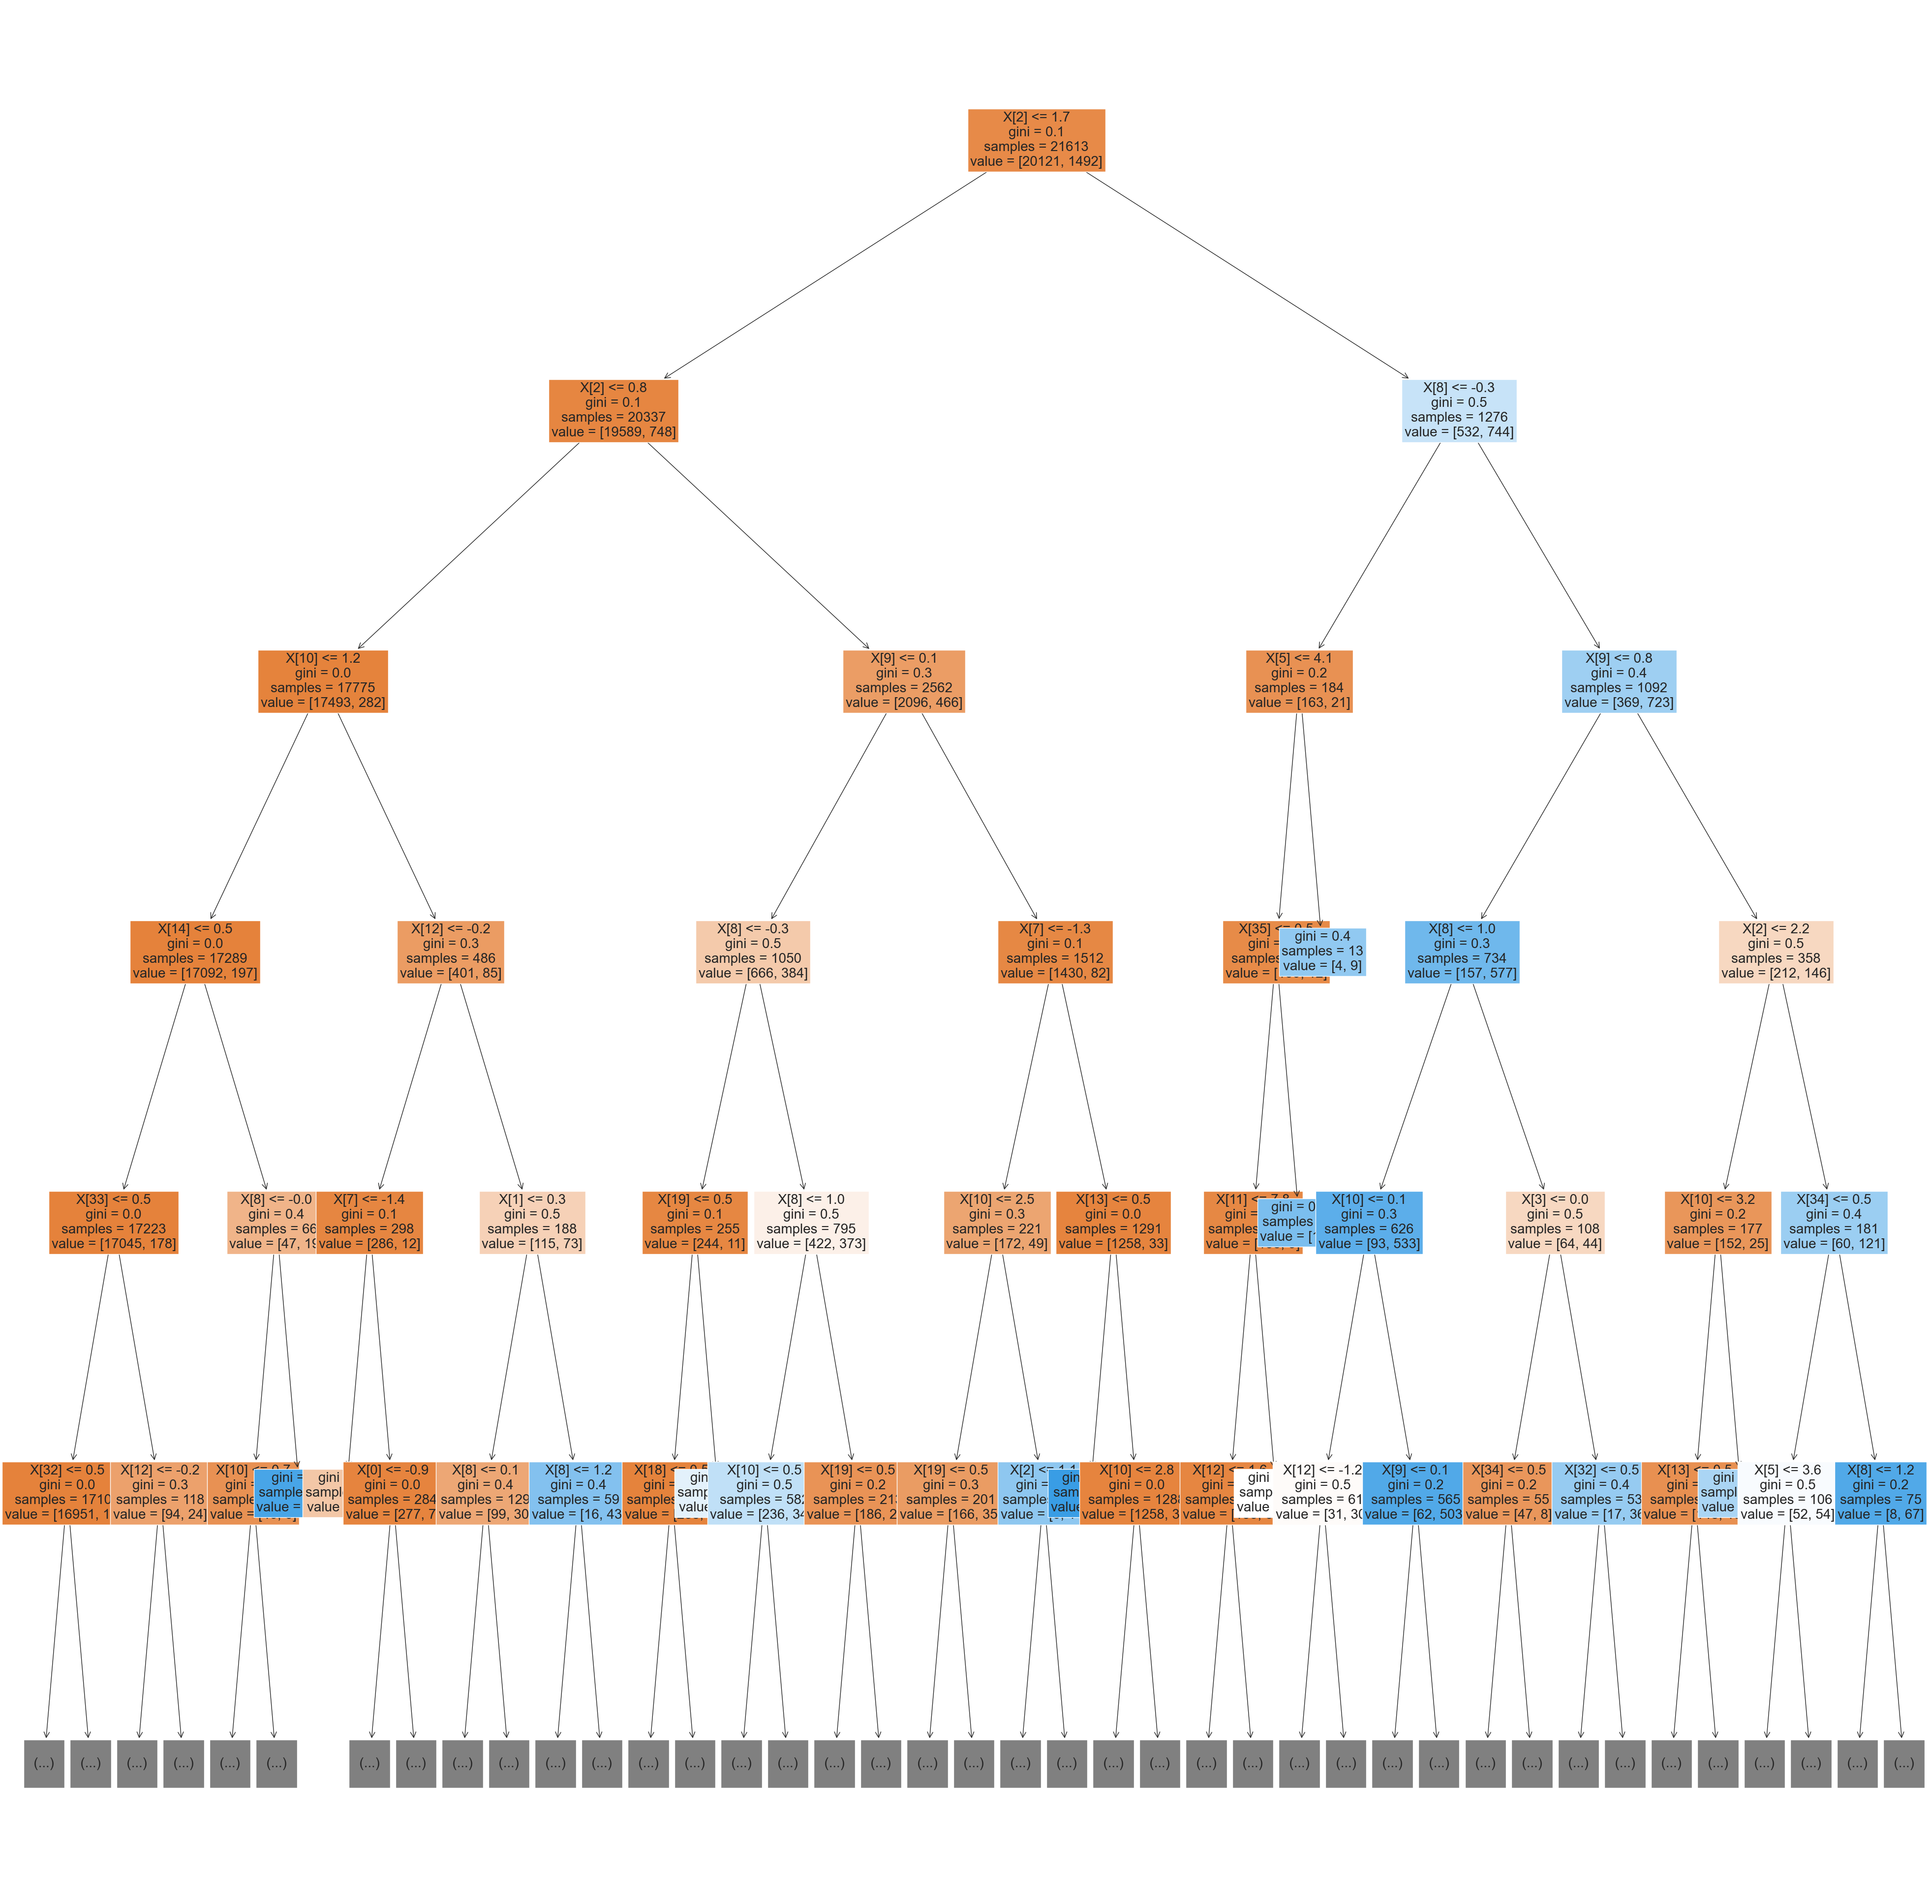

In [201]:
# Create a DecisionTreeClassifier model. 
dtree_model_1 = DecisionTreeClassifier(min_samples_split=20)

# Append classifier to preprocessing pipeline.
dtree_1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', dtree_model_1)])

# Fit the model using our features and target variables
dtree_1.fit(X, y)

# Get % accuracy on the training and test data using the score() method
print(f"Training score: {dtree_1.score(X_train, y_train):.3f}")
print(f"Test score: {dtree_1.score(X_test, y_test):.3f}")


#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(dtree_1, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Decision Tree Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(dtree_1, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Decision Tree Confusion Matrix - Test Data')


plt.figure(figsize=(50, 50))  # set plot size (denoted in inches)
plot_tree(
    dtree_1['classifier'],  # <-- added indexing here
    max_depth=5,
    impurity=True,
    precision=1,
    filled=True,
    fontsize=20
)
plt.show()


plt.figure(figsize=(100, 100))  # set plot size (denoted in inches)
plot_tree(
    dtree_1['classifier'],  # <-- added indexing here
    impurity=True,
    precision=1,
    filled=True,
    fontsize=30
)
plt.show()

With Decision tree model, our accuracy score is highest compared to all the previous regression (Ridge and Lasso) and dummyclassification models. Also, we are getting a higher TN and TP values. We do not need coefficient plot with decision tree, because decision tree produces information through visualization of trees, they do have coefficients but are too complex to generate coefficients for single predictors

## A little error exploration (more challenging)

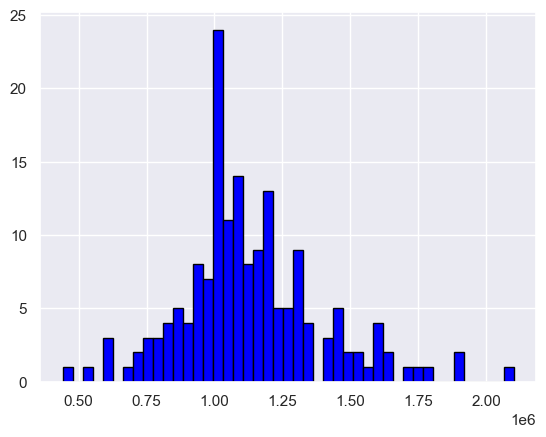

In [441]:
housing_org_df = pd.read_csv("./data/kc_house_data_original.csv")

new_cols = [col for col in housing_org_df.columns if col != 'price'] + ['price']
housing_org_df = housing_org_df[new_cols]

X_org = housing_org_df.iloc[:, 0:20]
y_org = housing_org_df.iloc[:, 20]

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, test_size=0.2, random_state=73)

predicted = clf_L1_C1.predict(X_test)

predicted_df = pd.DataFrame(data=predicted, columns=['y_pred'], 
                            index=y_test.index)

df21=X_test_org.merge(y_test,left_index=True, right_index=True)
df2=df21.merge(y_test_org,left_index=True, right_index=True)

df2=df2.merge(predicted_df,left_index=True, right_index=True)

df3 = df2[df2["price_gt_1M"]!= df2["y_pred"]]

plt.hist(df3['price'], color='blue', edgecolor='black', bins=int(45/1))
plt.show()





From the above graph of missclassified records, we can clearly see that our errors are high around the 1 million range. For other price ranges, we have errors but they are not that prominent to affect our error metrics.

## Optional Hacker Extra Credit tasks
### Task1

In [420]:
from sklearn.ensemble import HistGradientBoostingClassifier

Training score: 0.993
Test score: 0.973


Text(0.5, 1.0, 'Lasso Regression with optimal C value - Confusion Matrix - Test Data')

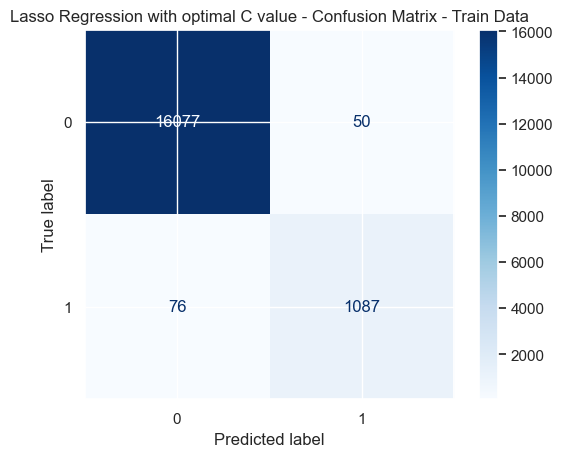

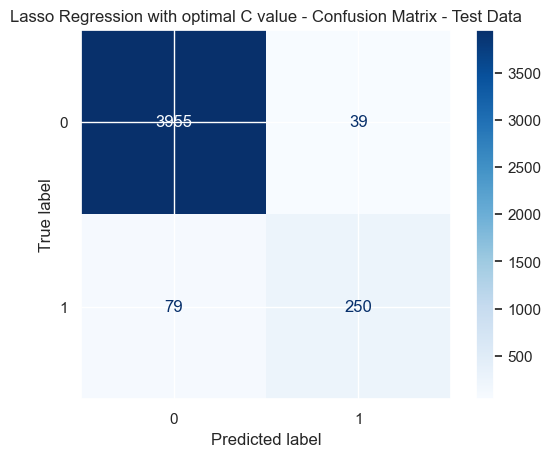

In [421]:
hgbm_model = HistGradientBoostingClassifier(random_state=42)

hgbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', hgbm_model)])

hgbm.fit(X_train, y_train)


print(f"Training score: {hgbm.score(X_train, y_train):.3f}")
print(f"Test score: {hgbm.score(X_test, y_test):.3f}")

#Confusion Matrix for train and test data 
cm1 = plot_confusion_matrix(hgbm, X_train, y_train, cmap='Blues')
cm1.ax_.set_title('Lasso Regression with optimal C value - Confusion Matrix - Train Data')

cm2 = plot_confusion_matrix(hgbm, X_test, y_test, cmap='Blues') 
cm2.ax_.set_title('Lasso Regression with optimal C value - Confusion Matrix - Test Data')




Compared to Logistic regression model and decision tree, the accuracy score for training set is better with the Histogram Based Gradient Boosting Classifier, however, with test set we see that the accuracy has slightly dropped and is a bit low (2% less than Logistic ridge/lasso with C=1.0 and 1% less than Decision Tree). 

### Task2

In [177]:
housing_org_df = pd.read_csv("./data/kc_house_data_regression.csv")

X = housing_class_df.iloc[:, 0:18]
y = housing_class_df.iloc[:, 18]

X['yr_built'] = X['yr_built'].map(lambda x: pd.to_datetime(f'{x}-01-01'))
X['age'] = (pd.to_datetime('now') - X['yr_built']).astype('<m8[Y]')

X["waterfront"] = X["waterfront"].astype("category")
X["view"] = X["view"].astype("category")
X["condition"] = X["condition"].astype("category")
X["grade"] = X["grade"].astype("category")


cols_to_keep = X.columns.tolist()
cols_to_keep
aggs_to_drop = ['yr_built', 'yr_renovated']

cols_to_keep = [c for c in cols_to_keep if c not in aggs_to_drop]
cols_to_keep

X = X.loc[:, cols_to_keep]

categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
all_cols = X.columns.tolist()


numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)


# Prediction model
# Lasso with 5 fold cross-validation
clf_model_LassoCV_C01 = LassoCV(cv=5, random_state=0, max_iter=10000)


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_LassoCV = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_LassoCV_C01)])

# Fit model on training data
clf_LassoCV.fit(X_train, y_train)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  price          21613 non-null  float64
dtypes: flo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade'])])),
                ('classifier', LassoCV(cv=5, max_iter=10000, random_state=0))]

In [181]:
#Show best value of penalization
alp = clf_LassoCV.named_steps['classifier'].alpha_

# Set best alpha
lasso_best = clf_LassoCV(alpha = alp)
lasso_best.fit(X_train, y_train)



TypeError: 'Pipeline' object is not callable